<a href="https://colab.research.google.com/github/NishaSharma142/Projects/blob/main/hini_vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**H1N1 Vaccine Prediction**
 This project is based on a classification problem where the objective is to predict how likely it is that the people will take an H1N1 flu vaccine. The dataset consists of 34 predictors including target variable i.e. h1n1 vaccine.

###**Installing the required libraries**

In [1]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade category_encoders
#!pip install scikit-learn==1.0

## **Importing Required libraries**
We are using the following libraries to perform the task :
* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn
* category_encoders
* From sklearn we can import various model like LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier etc.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import confusion_matrix
#from sklearn.ensemble import RandomForestClassifier
from numbers import Integral, Real
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import category_encoders as ce

In [4]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)

    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec':
        train_out = estimator.decision_function(X_tr)
        test_out = estimator.decision_function(X_te)
    elif roc_auc == 'proba':
        train_out = estimator.predict_proba(X_tr)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_te)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")

    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")

    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_te, test_out)}")

    # Plot confusion matrix for test set
    cm=confusion_matrix(estimator, X_te, y_te, cmap="plasma", normalize='true')


In [5]:
#!ls Data

## **Loading  dataset**

In [6]:
vaccine_df=pd.read_csv('/content/h1n1_vaccine_prediction.csv')

In [7]:
vaccine_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### **Data Pre-Processing**
Data Preprocessing is usually about data engineers getting large volumes of data from the sources — databases, object stores, data lakes, etc. and performing basic data cleaning and data wrangling preparing them for the later part, which is essentially important before modelling — feature engineering!

In [8]:
# Getting info about null values
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
vaccine_df.shape

(26707, 34)

In [10]:
# Getting number of null values
vaccine_df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
# Explore numerical columns
vaccine_df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [12]:
# Explore object columns
vaccine_df[[c for c in vaccine_df.columns if vaccine_df[c].dtype =='object']].describe()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


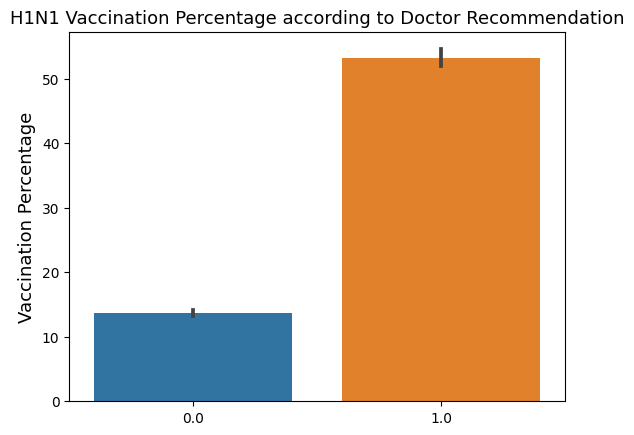

In [13]:
# Making a copy of main dataframe to use for visualizations
vaccine_df_copy = vaccine_df.copy()
# Graph for relationship between H1N1 vaccination and Doctor recommendation
dr = sns.barplot(x=vaccine_df_copy['dr_recc_h1n1_vacc'].dropna(), y=vaccine_df_copy['h1n1_vaccine']*100)
dr.set_xlabel('')
dr.set_ylabel('Vaccination Percentage', fontsize=13)
dr.set_title('H1N1 Vaccination Percentage according to Doctor Recommendation', fontsize=13);

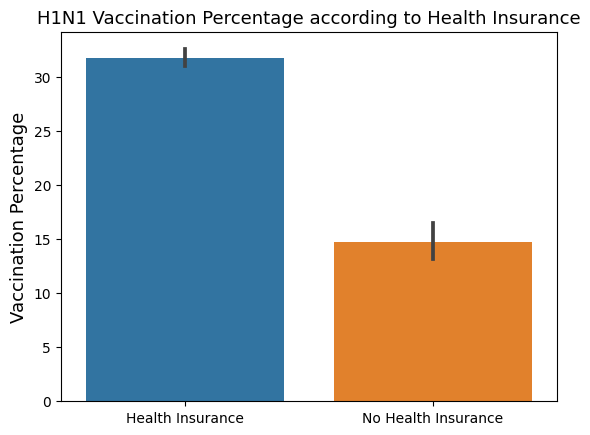

In [14]:
# Creating dictionary for mapping
insurance_dict = {1: 'Health Insurance',
           0: 'No Health Insurance'}
# Creating the column that will be used to create clear x axis tick marks in graph below
vaccine_df_copy['health_ins_words'] =vaccine_df_copy['has_health_insur'].replace(insurance_dict)
# Health Insurance graph
insurance = sns.barplot(x=vaccine_df_copy['health_ins_words'], y=vaccine_df_copy['h1n1_vaccine']*100)
insurance.set_xlabel('')
insurance.set_ylabel('Vaccination Percentage', fontsize=13)
insurance.set_title('H1N1 Vaccination Percentage according to Health Insurance', fontsize=13);

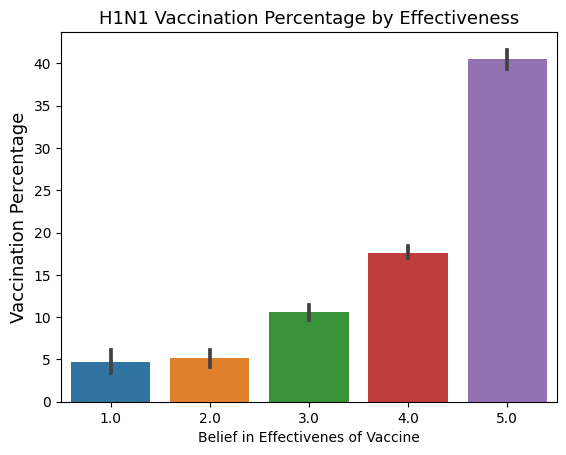

In [15]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
insurance = sns.barplot(x=vaccine_df_copy['is_h1n1_vacc_effective'].dropna(), y=vaccine_df_copy['h1n1_vaccine']*100)
insurance.set_xlabel('Belief in Effectivenes of Vaccine')
insurance.set_ylabel('Vaccination Percentage', fontsize=13)
insurance.set_title('H1N1 Vaccination Percentage by Effectiveness', fontsize=13);

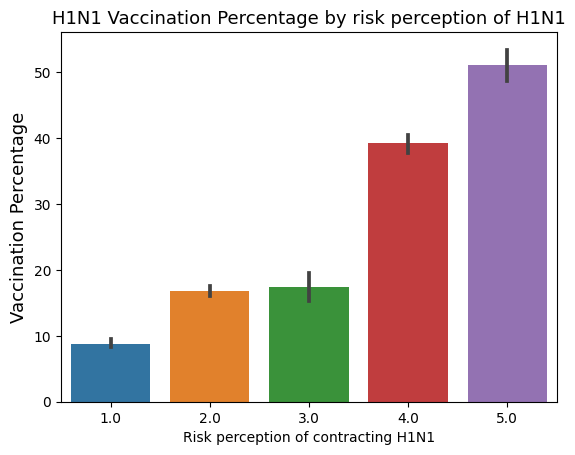

In [16]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
insurance = sns.barplot(x=vaccine_df_copy['is_h1n1_risky'].dropna(), y=vaccine_df_copy['h1n1_vaccine']*100)
insurance.set_xlabel('Risk perception of contracting H1N1')
insurance.set_ylabel('Vaccination Percentage', fontsize=13)
insurance.set_title('H1N1 Vaccination Percentage by risk perception of H1N1', fontsize=13);

In [17]:
# Define our X and y
X = vaccine_df.drop(columns = ['unique_id', 'h1n1_vaccine', 'dr_recc_seasonal_vacc'], axis=1)
y = vaccine_df['h1n1_vaccine']
# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=2, stratify=y)
# Regular Train Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=2, stratify=y_train)

In [18]:
# Set up lists for each columns datatypes
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [19]:
# We wanted to see each column category
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']


Object Columns (with less than 10 unique values): ['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa']


Object Columns (with more than 10 unique values): []


#### **Data Transformation**
Data transformation is the process of converting data from one format to another, typically from the format of a source system into the required format of a destination system. Data transformation is a component of most data integration and data management tasks, such as data wrangling and data warehousing.

In [20]:
# Preprocessing with Pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # replace missing values by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Scale the numbers by MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Transform each category into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # replace category names with frequency counts by CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # replace missing values by IterativeImputer
])

In [21]:
# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])
# Fitting preprocessor to see the components as a whole
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_worry', 'h1n1_awareness',
                                  'antiviral_medication', 'contact_avoidance',
                                  'bought_face_mask', 'wash_hands_frequently',
                                  'avoid_large_gatherings',
                                  'reduced_outside_home_cont',
                                  'avoid_touch_face', 'dr_recc_...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['age_bracket', 'qualification', 'race', 'sex',
                                  'income_level', 'marital_status',
                                  'housing_status', 'employment',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 [])])

In [22]:
# Let'see what this looks like after the preprocessor transformation
X_train_transformed = preprocessor.transform(X_tr)
X_train_transformed.shape

(19228, 55)

In [23]:
# Visualize it with Pandas dataframe
pd.DataFrame(X_train_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.5,0.011242,0.960972,1.0,0.899943,1.0,1.000000,1.0,1.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,1.0,0.011242,0.960972,0.0,0.899943,0.0,0.016084,0.0,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.5,0.011242,0.960972,0.0,0.899943,0.0,0.016084,1.0,0.131546,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,1.0,0.011242,0.960972,0.0,0.899943,0.0,0.016084,1.0,0.131546,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.666667,0.5,0.011242,0.960972,0.0,0.899943,0.0,1.000000,1.0,0.131546,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
#!pip install scikit-learn==1.2.2

In [25]:
#from sklearn.ensemble import RandomForestClassifier
'''from numbers import Integral, Real
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay'''

'from numbers import Integral, Real\nfrom sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier\n\nfrom sklearn.metrics import confusion_matrix\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import ConfusionMatrixDisplay'

##**Fitting a Random Forest classification model**
The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [45]:
# Setting up the RandomForestClassifier to go through the pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight= 'balanced', max_depth= 5, min_samples_leaf= 1,
                                          n_estimators= 200, random_state=10))
])

# Fitting the random forest model to the training data
rfc_model=rfc.fit(X_tr, y_tr)

In [46]:
predict_rfc = rfc_model.predict(X_te)
accuracy_rfc = accuracy_score(predict_rfc,y_te)
accuracy_rfc

0.7888935108153078

## **Fitting a Gradient boosting classifier**
In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
# Setting up the gradient boosting classifier
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=10))
])

# Fitting the gradient boosting classifier to the training data
gbc_model=gbc.fit(X_tr, y_tr)

#### **Predicting the Values and calculating accuracy of model**

In [48]:
predict_gbc=gbc_model.predict(X_te)
accuracy_gbc = accuracy_score(predict_gbc, y_te)
accuracy_gbc

0.8490016638935108

In [31]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate =0.1, n_estimators=200,
                                              max_depth=5,
                                              random_state=42))
])
final_model_output = final_model.fit(X_tr, y_tr)

###**Confusion matrix**
A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.

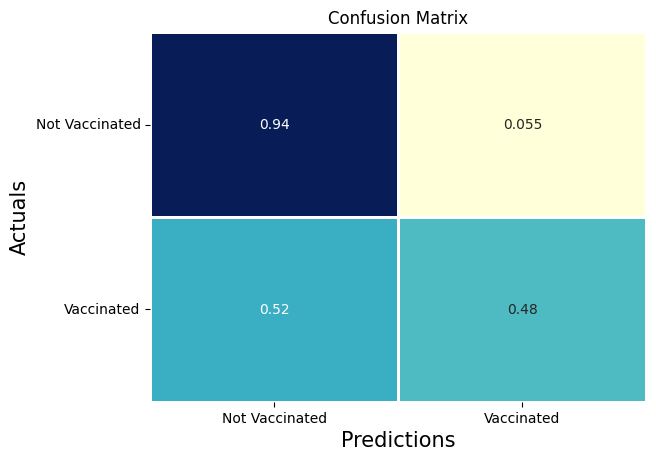

In [32]:
# we can calculate predictions for confusion matrix
final_model_prediction = final_model.predict(X_hold)
cm=confusion_matrix(y_hold, final_model_prediction, normalize='true')
# Plot heatmap for final model's confusion matrix for better visualization
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar=False, linewidths=1, cmap="YlGnBu");

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predictions', fontsize = 15)
ax.set_ylabel('Actuals', fontsize = 15)
ax.xaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'])
ax.yaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], rotation = 0, fontsize = 10);

##### **Calculating accuracy score of the gradient boosting classifier**

In [33]:
accuracy=accuracy_score(final_model_prediction,y_hold)

In [34]:
accuracy

0.8457506551853239

In [35]:
# Accessing the features of the preproccesor
final_model['preprocessor']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_worry', 'h1n1_awareness',
                                  'antiviral_medication', 'contact_avoidance',
                                  'bought_face_mask', 'wash_hands_frequently',
                                  'avoid_large_gatherings',
                                  'reduced_outside_home_cont',
                                  'avoid_touch_face', 'dr_recc_...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['age_bracket', 'qualification', 'race', 'sex',
                                  'income_level', 'marital_status',
                                  'housing_status', 'employment',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 [])])

In [36]:
# We are looking at the shape of the preprocessor transformation.
final_model['preprocessor'].fit_transform(X_tr).shape

(19228, 55)

In [37]:
# We are looking at the transformed data
pd.DataFrame(final_model['preprocessor'].fit_transform(X_tr)).head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.5,0.011242,0.960972,1.0,0.899943,1.0,1.000000,1.0,1.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,1.0,0.011242,0.960972,0.0,0.899943,0.0,0.016084,0.0,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.5,0.011242,0.960972,0.0,0.899943,0.0,0.016084,1.0,0.131546,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,1.0,0.011242,0.960972,0.0,0.899943,0.0,0.016084,1.0,0.131546,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.666667,0.5,0.011242,0.960972,0.0,0.899943,0.0,1.000000,1.0,0.131546,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# We are looking at the feature importances coming out of. the gradient boosting classifier
final_model['classifier'].feature_importances_

array([0.00907321, 0.01369385, 0.00590065, 0.00343875, 0.00406254,
       0.00261763, 0.00389294, 0.00275526, 0.00228251, 0.33181493,
       0.00709768, 0.01133094, 0.04459513, 0.17707385, 0.08896629,
       0.11578116, 0.01722206, 0.01411991, 0.02857235, 0.00870047,
       0.00765616, 0.00722267, 0.00372239, 0.00109504, 0.00163087,
       0.00307858, 0.00592889, 0.00161839, 0.00269   , 0.00707454,
       0.00205941, 0.00318966, 0.00572224, 0.00241759, 0.00168988,
       0.00438871, 0.00331611, 0.00295234, 0.00248677, 0.00341032,
       0.00294988, 0.00145838, 0.00306406, 0.00221734, 0.00065093,
       0.00089206, 0.00305458, 0.00310899, 0.0017659 , 0.00253951,
       0.00229561, 0.0015721 , 0.00346858, 0.00211821, 0.00250122])

In [39]:
# Name of the numerical columns
num_cols

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']